In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Setting options
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
# Loading in data
df = pd.read_csv("Data/modified-Data_Cortex_Nuclear.csv")
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Type of Mouse,Treatment,Training,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Normal,Drug,Trained,Normal-Trained-Drug
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Normal,Drug,Trained,Normal-Trained-Drug
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Normal,Drug,Trained,Normal-Trained-Drug
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Normal,Drug,Trained,Normal-Trained-Drug
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.18571

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Dtype  
---  ------           -----  
 0   MouseID          object 
 1   DYRK1A_N         float64
 2   ITSN1_N          float64
 3   BDNF_N           float64
 4   NR1_N            float64
 5   NR2A_N           float64
 6   pAKT_N           float64
 7   pBRAF_N          float64
 8   pCAMKII_N        float64
 9   pCREB_N          float64
 10  pELK_N           float64
 11  pERK_N           float64
 12  pJNK_N           float64
 13  PKCA_N           float64
 14  pMEK_N           float64
 15  pNR1_N           float64
 16  pNR2A_N          float64
 17  pNR2B_N          float64
 18  pPKCAB_N         float64
 19  pRSK_N           float64
 20  AKT_N            float64
 21  BRAF_N           float64
 22  CAMKII_N         float64
 23  CREB_N           float64
 24  ELK_N            float64
 25  ERK_N            float64
 26  GSK3B_N          float64
 27  JNK_N            f

In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
    
    
    
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [5]:
# Check for null values
df.isna().sum().sum()

1396

In [6]:
# Defining target and relevant features
y = df['Treatment'].copy()
X = df.drop(columns = ["Type of Mouse","Training","MouseID","class","Treatment"]).copy()
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [7]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
# We want a pipeline to impute nulls as 0's and scale the data
cols = X_train.select_dtypes("number").columns
# Placing imputer
impute = SimpleImputer(strategy = "constant", fill_value = 0)
# Placing scaler
scaler = StandardScaler()
# Making pipeline to transform data
pipe = make_pipeline(impute, scaler)
# Putting together tuple for column transformer
tuple = ('numeric', pipe, cols)

In [9]:
# Making preprocessor
preprocessor = ColumnTransformer([tuple], verbose_feature_names_out = False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N...
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [10]:
# Fitting to training data
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
645,2.139016,2.956972,2.876556,2.232042,2.120283,-0.282077,0.907098,-0.935587,1.536300,2.152465,2.612267,0.286272,1.641118,0.601277,2.006137,-0.279041,2.438824,1.446233,0.254887,1.824276,1.849890,0.527689,1.140156,2.702241,2.412916,2.799412,1.683349,1.836471,1.979471,0.945371,2.353895,2.248787,-0.472013,0.273824,-0.747645,0.841301,0.896143,1.792662,0.811057,1.143785,0.876347,2.061710,-0.897954,0.921534,0.920928,2.319197,-0.987199,0.656318,0.758937,0.343748,-0.606266,-0.490693,0.506368,-0.474443,-0.009046,1.210448,-0.347577,-1.235121,0.135494,-0.026402,-0.836068,-0.173561,1.081103,-0.557721,-1.329488,-0.640226,0.440522,-1.357779,-0.178339,0.082266,-0.474443,-0.475639,0.453645,-0.569667,-0.259432,-0.317467,1.686155
242,-0.526639,-0.706452,-0.571134,0.370434,1.023696,-0.593489,-0.652113,1.646098,-0.510066,-0.112598,-0.476555,0.224364,-0.089392,-0.318552,0.548205,1.720575,0.906473,-0.507271,-0.993495,0.162540,-0.685187,-0.367125,-0.831671,0.304119,-0.288635,-0.198403,-0.618266,-0.641695,-0.551665,-1.481378,-0.763227,0.682237,-0.225268,0.207621,0.797691,1.147898,0.001387,1.086859,0.216939,0.426115,1.585045,0.529424,0.492070,0.069140,0.044414,-0.825624,-0.112264,-0.651533,-0.909473,0.535185,-0.015041,0.525915,1.155276,0.573536,-0.735536,0.885877,-0.538135,-0.567798,1.387471,0.698026,-1.194700,-0.761267,-0.595844,-0.063165,0.495137,0.630733,-1.116684,-0.638498,0.288537,0.659021,0.573536,0.155172,0.708056,0.390493,-1.808137,0.322900,-1.859111
230,-0.516662,-0.488427,-0.827755,-0.159024,0.134908,-0.515817,-0.363915,1.714218,-0.706785,-0.538627,-0.510503,0.460609,-0.571483,0.112821,0.198134,1.485152,0.150871,-0.664894,-0.127730,-0.218043,-0.821285,-0.876836,-0.198290,0.044891,-0.433109,-0.590089,-0.736727,-0.439183,-0.347604,-1.003886,-0.141713,0.203558,0.208867,-0.239201,0.335024,0.441358,-0.051084,-0.000393,1.217230,-0.082341,0.002433,0.194156,-0.388670,-0.142957,0.692079,-0.612811,-0.011698,-0.350454,-0.098356,0.751544,-0.320388,0.214933,0.618137,0.336655,-0.143362,0.766610,-0.521770,-0.752972,1.550663,0.855005,0.849265,-0.744934,1.044302,1.397902,0.291239,0.880272,-0.207925,-1.058475,0.624542,0.646278,0.336655,0.594818,0.703887,0.307887,0.921381,0.633530,-0.745027
990,0.134971,0.418132,1.276051,0.867135,0.640021,0.769616,0.107876,1.422891,2.023356,-0.178773,-0.173406,1.097171,1.628443,1.255469,1.121694,1.415894,0.878798,0.333416,1.811093,1.164470,-0.333136,-0.184963,0.139142,2.133005,1.729405,0.275036,0.304864,1.725239,1.077542,-0.355405,1.440284,1.907569,0.898257,0.089197,0.636497,0.773308,-0.091799,0.555036,0.109875,0.634491,0.884435,0.760914,0.185197,1.221339,2.459452,1.285002,1.546086,0.845736,0.069159,0.589551,0.244479,-0.039383,0.370300,0.568549,1.219394,1.064465,0.990199,-0.212906,0.193206,0.518442,-0.347785,0.199218,2.332200,0.130413,-0.717473,0.983583,1.029593,0.386549,0.374482,0.349908,0.568549,-0.121424,1.884557,0.291238,0.202342,0.186133,0.129130
114,-0.437210,-0.609469,-0.647825,-0.806692,-0.633590,-0.132506,0.621628,-1.229171,-0.367598,-0.568243,-0.171470,0.002526,-0.876960,-1.000047,-0.610249,-0.883686,-0.683245,-1.226135,-0.986426,-1.122481,-0.418736,-0.282953,-0.138689,-0.783550,-0.223151,-0.687877,-0.139005,-0.837232,-0.503228,-0.095689,-0.817922,-0.661628,-0.812628,0.076329,0.472184,-0.247329,-0.063442,-0.950864,0.481317,0.243104,-0.295084,-0.751589,-1.307558,-0.537865,0.125148,-0.004616,-1.279699,-0.560424,0.325328,-0.919918,-0.671940,

In [11]:
# Check the balance of the target
y.value_counts(1)

Drug       0.527778
Placebo    0.472222
Name: Treatment, dtype: float64

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       430
     Placebo       1.00      1.00      1.00       380

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



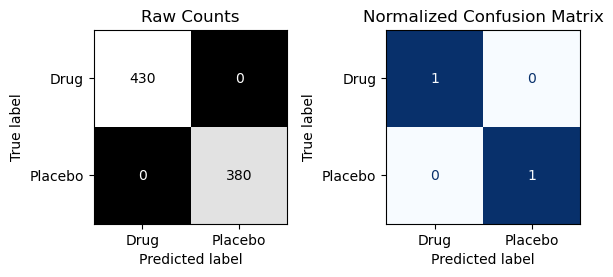


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.99      1.00      1.00       140
     Placebo       1.00      0.99      1.00       130

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



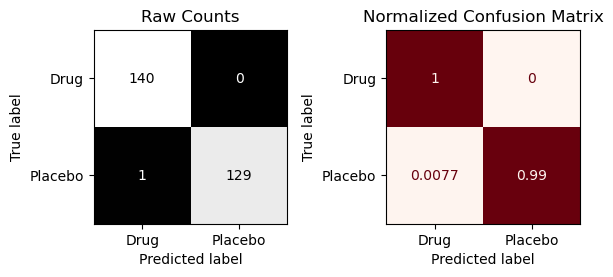

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate a default random forest with a random state for reproductibility
rf_clf = RandomForestClassifier(random_state=28)

# Fit on the training data
rf_clf.fit(X_train_tf, y_train)

# Evaluate with the custom function
evaluate_classification(rf_clf, X_train_tf, y_train, X_test_tf, y_test)

In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Making decision tree model
dt = DecisionTreeClassifier(random_state = 28)

In [15]:
# Instantiate the SequentialFeatureSelector
sfs = SequentialFeatureSelector(dt, n_features_to_select=39,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sfs.fit(X_train_tf,y_train)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=28),
                          n_features_to_select=39, n_jobs=-1)

In [16]:
# Preview array
sfs.support_[0:5]

array([False,  True, False, False, False])

In [17]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sfs.support_
# Only include the features selected
X_train_39 = X_train_tf.loc[:,features_to_keep]
X_test_39 = X_test_tf.loc[:,features_to_keep]
X_train_39.shape

(810, 39)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       430
     Placebo       1.00      1.00      1.00       380

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



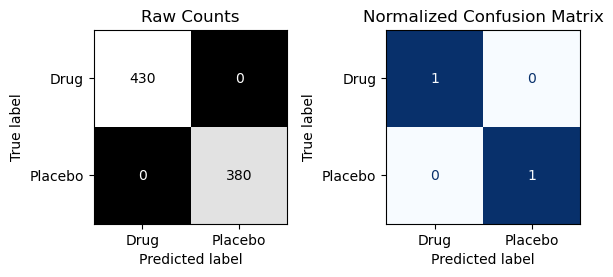


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.99      1.00      1.00       140
     Placebo       1.00      0.99      1.00       130

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



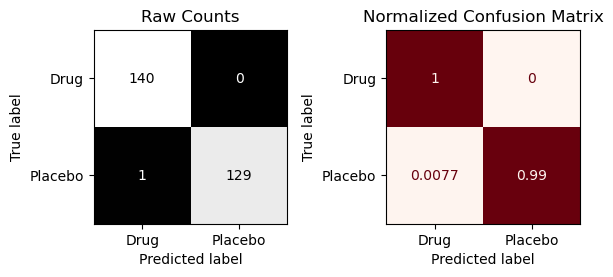

In [18]:
# Instantiate default random forest
rf_clf = RandomForestClassifier(random_state=28)
# Fit on 39 selected featuers
rf_clf.fit(X_train_39, y_train)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_39, y_train, X_test_39, y_test)

In [19]:
# Instantiate the SequentialFeatureSelector
sfs2 = SequentialFeatureSelector(dt, n_features_to_select=19,
                                direction = 'forward', cv=2,
                                 n_jobs=-1)
sfs2.fit(X_train_tf, y_train)

SequentialFeatureSelector(cv=2,
                          estimator=DecisionTreeClassifier(random_state=28),
                          n_features_to_select=19, n_jobs=-1)

In [20]:
# Preview array
sfs2.support_[0:5]

array([False, False, False, False, False])

In [21]:
# .support_ returns an array of T/F whether it is above threshold
features_to_keep = sfs2.support_
# Only include the features selected
X_train_19 = X_train_tf.loc[:,features_to_keep]
X_test_19 = X_test_tf.loc[:,features_to_keep]
X_train_19.shape

(810, 19)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       1.00      1.00      1.00       430
     Placebo       1.00      1.00      1.00       380

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



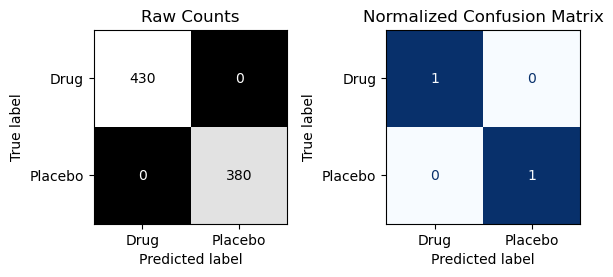


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        Drug       0.96      1.00      0.98       140
     Placebo       1.00      0.95      0.98       130

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



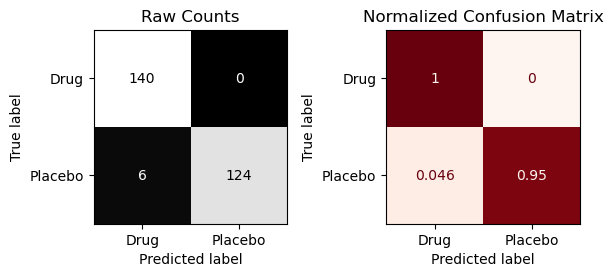

In [22]:
# Fit on 39 selected featuers
rf_clf.fit(X_train_19, y_train)
# Evaluate with custom function
evaluate_classification(rf_clf, X_train_19, y_train, X_test_19, y_test)

### With only 19 features, the final model begins to show a little less accuracy. However this slight decrease is offset by the fact this model will be significantly easier to work with and load faster and experiment with.